In [1]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.interpolate as sci

import gala.coordinates as gc

import galstreams
from pyia import GaiaData

In [2]:
import galstreams
mwsts = galstreams.MWStreams(verbose=False, implement_Off=False)
mwsts.get_track_names_for_stream('Pal')

Initializing galstreams library from master_log... 


['Cetus-Palca-T21',
 'Cetus-Palca-Y21',
 'Pal13-S20',
 'Pal15-M17',
 'Pal5-I21',
 'Pal5-PW19',
 'Pal5-S20',
 'Palca-S18']

In [3]:
mwsts.summary

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,dec_f,distance_f,ra_mid,dec_mid,distance_mid,ra_pole,dec_pole,InfoFlags,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
20.0-1-M18,po,True,20.0-1-M18,20.0-1,mateu2018,Mateu2018,-,36.619756,280.225879,-41.031405,...,-16.281973,25.126725,298.182168,-29.913159,26.839948,235.758575,38.821881,0000,Mateu2018,1
300S-F18,st,True,300S-F18,300S,fu2018,Fu2018,-,11.084050,151.800005,16.046962,...,14.448969,14.350060,157.510431,15.343949,15.929409,308.056470,72.509388,1101,"NiedersteOstholt2009,Simon2011",2
AAU-AliqaUma-L21,st,True,AAU-AliqaUma-L21,AAU-AliqaUma,li2021,Li2021,-,9.677187,0.417097,-15.901759,...,-20.427757,24.636741,4.915075,-18.117867,26.923444,64.503226,57.120874,1111,Shipp2018,3
AAU-ATLAS-L21,st,True,AAU-ATLAS-L21,AAU-ATLAS,li2021,Li2021,-,23.561687,8.931901,-21.023379,...,-33.199331,18.525495,20.058646,-26.983189,20.885277,73.360646,49.567099,1111,Koposov2014,4
Acheron-G09,ep,True,Acheron-G09,Acheron,grillmair2009,Grillmair2009,-,36.532092,230.000000,-2.000000,...,21.000000,3.800000,244.604606,10.300419,3.656382,142.339428,49.453184,0000,Grillmair2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turranburra-S19,st,True,Turranburra-S19,Turranburra,shipp2019,"Shipp2019,Shipp2018",-,13.729050,59.707970,-18.554702,...,-25.275911,27.500000,67.141164,-22.183041,27.500000,123.473122,53.283631,1010,Shipp2018,93
Vid-I21,st,True,Vid-I21,Vid,ibata2021,Ibata2021,-,18.115243,17.350232,-25.248735,...,-34.861329,20.394279,25.819117,-30.331205,24.642130,80.544842,44.626077,1110,Ibata2021,94
Wambelong-S18,ep,True,Wambelong-S18,Wambelong,shipp2018,"Shipp2018,Shipp2019",-,14.162214,90.500000,-45.600000,...,-34.300000,15.100000,84.434473,-40.084053,15.100000,328.673187,-27.312855,0020,Shipp2018,95


In [4]:
mwsts.get_track_names_for_stream('Pal')

['Cetus-Palca-T21',
 'Cetus-Palca-Y21',
 'Pal13-S20',
 'Pal15-M17',
 'Pal5-I21',
 'Pal5-PW19',
 'Pal5-S20',
 'Palca-S18']

In [5]:
mwsts.get_track_names_for_stream('Pal', On_only=True)

['Cetus-Palca-T21', 'Pal13-S20', 'Pal15-M17', 'Pal5-PW19', 'Palca-S18']

In [6]:
mwsts['Pal5-PW19'].track

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(242.09382437,  6.88309503, 22.02340828),
     (242.08670244,  6.87558676, 22.02333424),
     (242.07954494,  6.86813405, 22.02325892), ...,
     (224.67592037, -4.79218842, 19.09368606),
     (224.66687368, -4.79668187, 19.09096063),
     (224.65738999, -4.80051508, 19.08823394)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-2.12850417, -2.34952027, 999.00002274),
     (-2.12922183, -2.34945636, 999.00002274),
     (-2.12993892, -2.34939303, 999.00002274), ...,
     (-2.77331871, -3.06772628, 999.00002188),
     (-2.77323034, -3.0684521 , 999.00002188),
     (-2.77314357, -3.06917651, 999.00002188)]>

In [7]:
from matplotlib.colors import LogNorm

from ugali import isochrone
from ugali.analysis.isochrone import factory as isochrone_factory

In [8]:
def plot_iso(iso):
    plt.scatter(iso.mag_1-iso.mag_2,iso.mag_1+iso.distance_modulus,marker='o',c='k')
    plt.gca().invert_yaxis()
    plt.xlabel('%s - %s'%(iso.band_1,iso.band_2)); plt.ylabel(iso.band_1)

In [9]:
age = 12. #Gyr
mu =  20.
z = 0.0002

Dotter
  Parameters:
    distance_modulus : Parameter(20.0, [10.0, 30.0], False)
    age              : Parameter(12.0, [10.0, 12.0], False)
    metallicity      : Parameter(0.0002, [0.0001, 0.0002], False)
  Filename: /home/mardom/.ugali/isochrones/ps1/dotter2016/iso_a12.0_z0.00020.dat


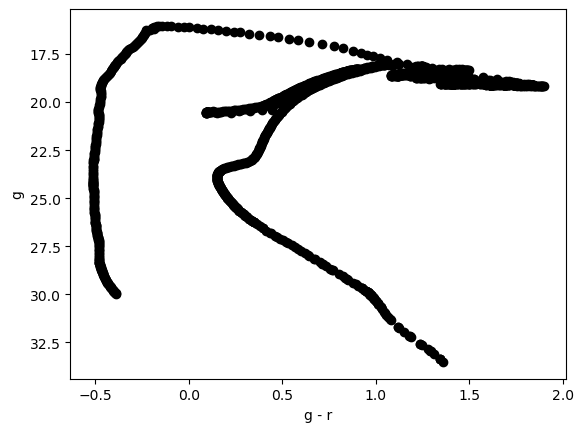

In [10]:
iso = isochrone_factory('Dotter', survey='ps1', age=age, distance_modulus=mu, z=z, band_1 = 'g', band_2 = 'r')
print(iso)
plot_iso(iso)

Dotter
  Parameters:
    distance_modulus : Parameter(20.0, [10.0, 30.0], False)
    age              : Parameter(12.0, [10.0, 12.0], False)
    metallicity      : Parameter(0.0002, [0.0001, 0.0002], False)
  Filename: /home/mardom/.ugali/isochrones/ps1/dotter2016/iso_a12.0_z0.00020.dat


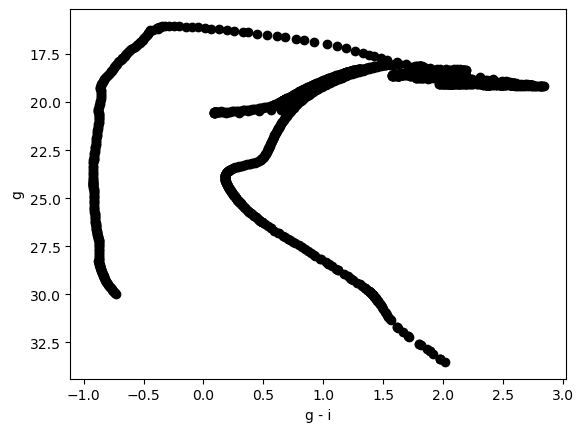

In [11]:
iso1 = isochrone_factory('Dotter', survey='ps1', age=age, distance_modulus=mu, z=z, band_1 = 'g', band_2 = 'i')
print(iso1)
plot_iso(iso1)

In [12]:
# original code from APW@Streams22

In [13]:
mws = galstreams.MWStreams(verbose=False, implement_Off=True)

Initializing galstreams library from master_log... 


In [14]:
streams = {
    'GD-1': 'GD-1-PB18',
    'Pal5': 'Pal5-PW19',
    'Jhelum': 'Jhelum-b-B19',
    'Fjorm-M68': 'M68-P19',
    'PS1-A': 'PS1-A-B16',
}

In [15]:
# name = 'GD-1'
# name = 'Fjorm-M68'
# name = 'Jhelum'
name = 'Pal5'
# name = 'PS1-A'

gaia_tbl = at.Table.read(f'../data/cats/GaiaDR3-{name}-all.fits')
ps1_tbl = at.Table.read(f'../data/cats/PS1DR2-{name}_xm.fits')


data = at.unique(
    at.join(gaia_tbl, ps1_tbl, keys='source_id'),
    keys='source_id'
)

g = GaiaData(data)
gs = mws[streams[name]]
stream_fr = gs.stream_frame
track = gs.track.transform_to(stream_fr)
track_refl = gc.reflex_correct(track)

In [16]:
phi2_interp = sci.InterpolatedUnivariateSpline(
    track.phi1.degree, track.phi2.degree,
)
dist_interp = sci.InterpolatedUnivariateSpline(
    track.phi1.degree, track.distance.value, k=3
)

In [17]:
c = g.get_skycoord(distance=False)
c_stream = c.transform_to(stream_fr)

c = g.get_skycoord(
    distance=dist_interp(c_stream.phi1.degree) * u.kpc,
    radial_velocity=0*u.km/u.s
)
c_stream = c.transform_to(stream_fr)
c_stream_refl = gc.reflex_correct(c_stream)

In [18]:
sky_track_mask = np.abs(c_stream.phi2.degree - phi2_interp(c_stream.phi1.degree)) < 0.5
off_track_mask = (
    (np.abs(c_stream.phi2.degree - phi2_interp(c_stream.phi1.degree) - 1.) < 0.25) |
    (np.abs(c_stream.phi2.degree - phi2_interp(c_stream.phi1.degree) + 1.) < 0.25)
)

In [19]:
c_stream.frame_attributes

{'pole': <astropy.coordinates.attributes.CoordinateAttribute at 0x7fe28458dbd0>,
 'center': <astropy.coordinates.attributes.CoordinateAttribute at 0x7fe28458dc30>,
 'ra0': <astropy.coordinates.attributes.QuantityAttribute at 0x7fe28458dc90>,
 'rotation': <astropy.coordinates.attributes.QuantityAttribute at 0x7fe28458dd20>}

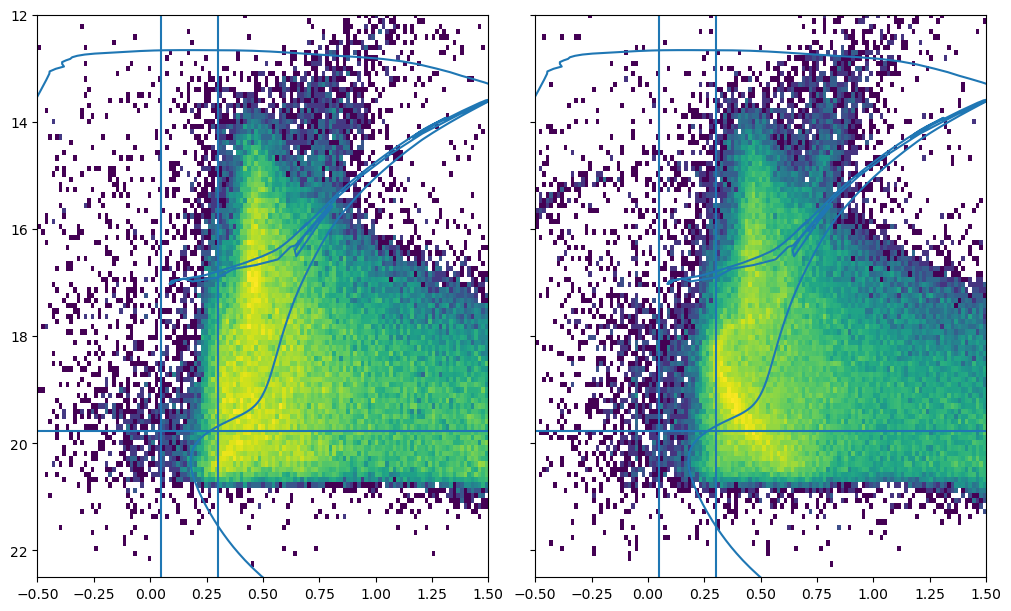

In [20]:
mask = sky_track_mask

color = g.g0 - g.i0
mag = g.r0

fig, axes = plt.subplots(
    1, 2, figsize=(10, 6), sharex=True, sharey=True, 
    constrained_layout=True
)

bins = (
    np.linspace(-0.5, 1.5, 128),
    np.linspace(10, 22.5, 128)
)
axes[0].hist2d(
    color[mask],
    mag[mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[1].hist2d(
    color[off_track_mask],
    mag[off_track_mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[0].set_ylim(22.5, 12)

for ax in axes:
    ax.plot(
        iso1.mag_1 - iso1.mag_2, 
        iso.mag_2 + coord.Distance(dist_interp(0.)*u.kpc).distmod.value, 
        marker='',
        color='tab:blue'
    )

    color_cut = 0.3
    mag_cut = 3.2 + coord.Distance(dist_interp(0.)*u.kpc).distmod.value
    ax.axvline(color_cut)
    ax.axvline(0.05)
    ax.axhline(mag_cut)

ms_box_mask = (
    (color < color_cut) & (color > 0.05) &
    (mag > mag_cut)
)

Text(0, 0.5, '$\\mu_{\\phi_2}$')

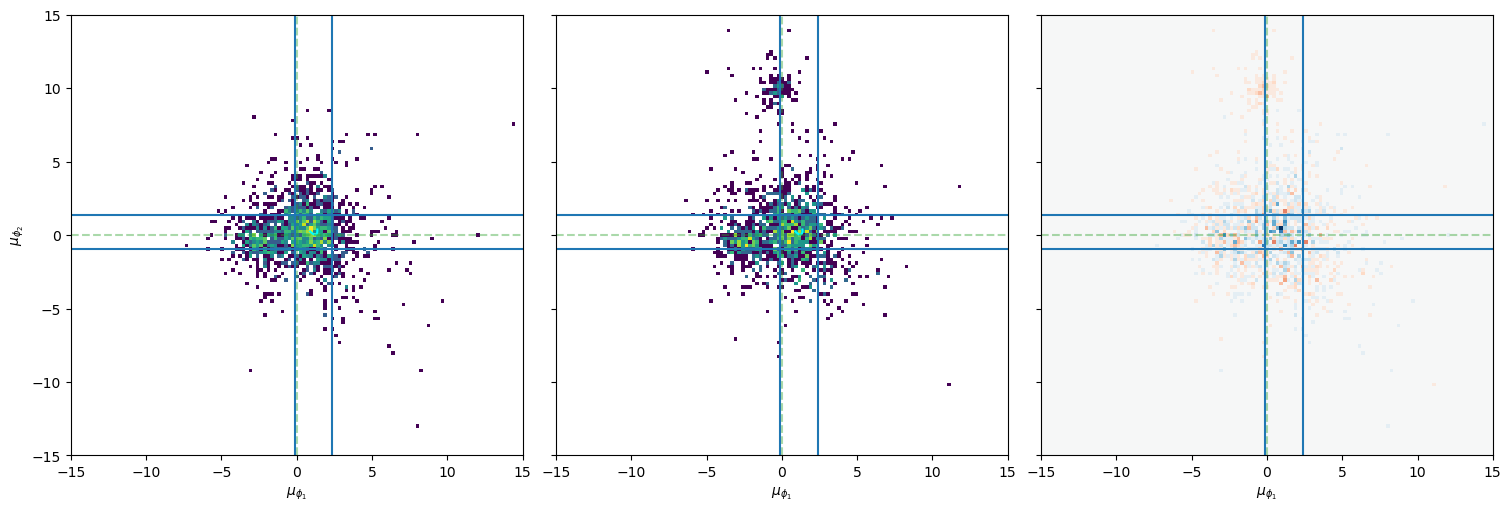

In [21]:
mask = sky_track_mask & ms_box_mask
off_mask = off_track_mask & ms_box_mask

# pm1_cut = (0., 2)
# pm2_cut = (-1, 2)
if np.all(track.pm_phi1_cosphi2.value == 0):
    print("no proper motion info: selecting broadly")
    pm1_cut = (-10, 10)
    pm2_cut = (-1.5, 1.5)
    
else:
    pm1_cut = (
        track_refl.pm_phi1_cosphi2.value.min() - 1.,
        track_refl.pm_phi1_cosphi2.value.max() + 1.
    )
    pm2_cut = (
        track_refl.pm_phi2.value.min() - 1.,
        track_refl.pm_phi2.value.max() + 1.
    )

pm1_mask = (
    (c_stream_refl.pm_phi1_cosphi2.value > pm1_cut[0]) &
    (c_stream_refl.pm_phi1_cosphi2.value < pm1_cut[1])
)
pm2_mask = (
    (c_stream_refl.pm_phi2.value > pm2_cut[0]) &
    (c_stream_refl.pm_phi2.value < pm2_cut[1])
)
pm_box_mask = pm1_mask & pm2_mask

fig, axes = plt.subplots(
    1, 3,
    figsize=(15, 5), sharex=True, sharey=True, 
    constrained_layout=True
)

bins = np.linspace(-15, 15, 128)
H1, xe, ye, _ = axes[0].hist2d(
    c_stream_refl.pm_phi1_cosphi2.value[mask],
    c_stream_refl.pm_phi2.value[mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)
H2, *_ = axes[1].hist2d(
    c_stream_refl.pm_phi1_cosphi2.value[off_mask],
    c_stream_refl.pm_phi2.value[off_mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[2].pcolormesh(xe, ye, (H1 - H2).T, cmap='RdBu', vmin=-10, vmax=10)

for ax in axes[:2]:
    ax.plot(
        track_refl.pm_phi1_cosphi2.value,
        track_refl.pm_phi2.value,
        color='cyan'
    )
    
for ax in axes:
    ax.axhline(0., linestyle='--', color='tab:green', alpha=0.4)
    ax.axvline(0., linestyle='--', color='tab:green', alpha=0.4)

    for x in pm1_cut:
        ax.axvline(x)
    for x in pm2_cut:
        ax.axhline(x)
    
    ax.set_xlabel(r'$\mu_{\phi_1}$')
axes[0].set_ylabel(r'$\mu_{\phi_2}$')

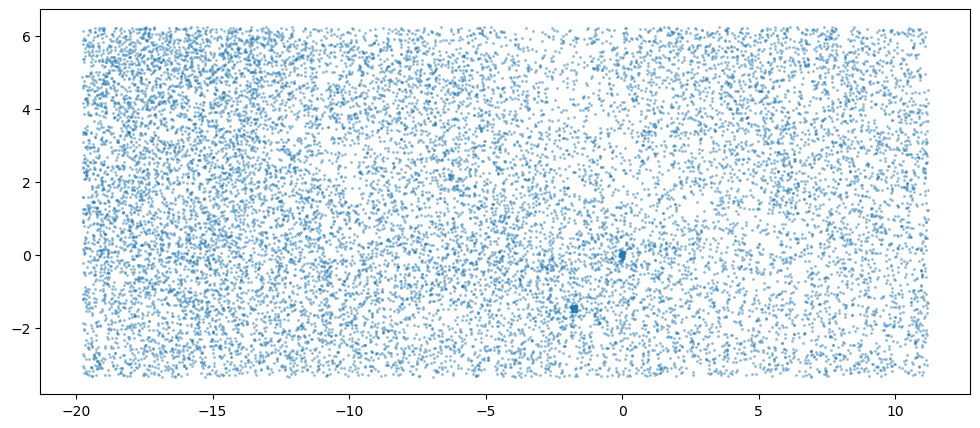

In [22]:
mask = ms_box_mask

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    c_stream.phi1.degree[mask],
    c_stream.phi2.degree[mask],
    ls='none', 
    marker='o',
    mew=0,
    ms=2.,
    alpha=0.5
);

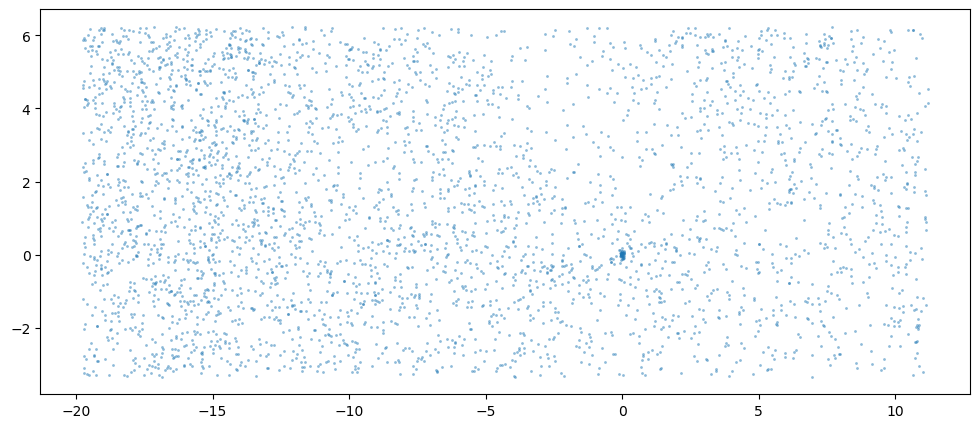

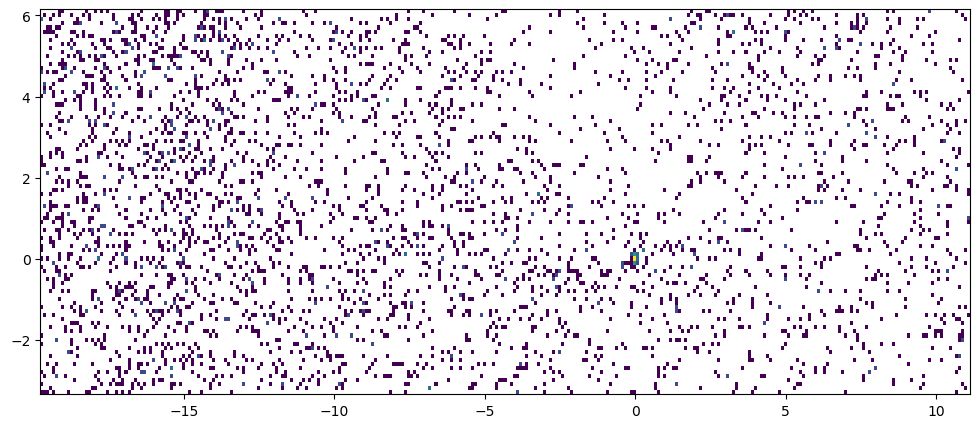

In [23]:
mask = ms_box_mask & pm_box_mask

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    c_stream.phi1.degree[mask],
    c_stream.phi2.degree[mask],
    ls='none', 
    marker='o',
    mew=0,
    ms=2.,
    alpha=0.5
);

fig, ax = plt.subplots(figsize=(12, 5))
ax.hist2d(
    c_stream.phi1.degree[mask],
    c_stream.phi2.degree[mask],
    bins=(np.arange(c_stream.phi1.degree.min(), c_stream.phi1.degree.max(), 0.1),
          np.arange(c_stream.phi2.degree.min(), c_stream.phi2.degree.max(), 0.1)),
    norm=mpl.colors.LogNorm()
);

#ax.plot(track_stream.phi1.degree, track_stream.phi2.degree)
#track_stream = mwsts['Pal5-PW19'].track.
#ax.plot(mwsts['Pal5-PW19'].track.phi1, mwsts['Pal5-PW19'].track.phi2)


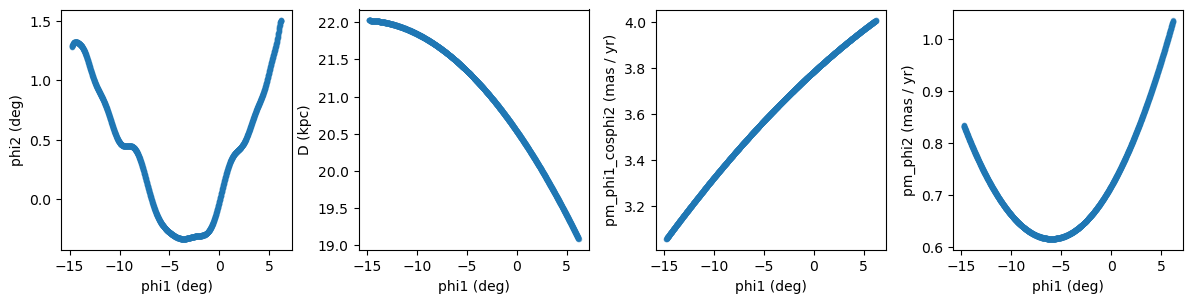

In [24]:
fr = mwsts['Pal5-PW19'].stream_frame
galstreams.plot_5D_tracks_subplots_row(mwsts['Pal5-PW19'].track, frame = fr , show_ylabels=True)

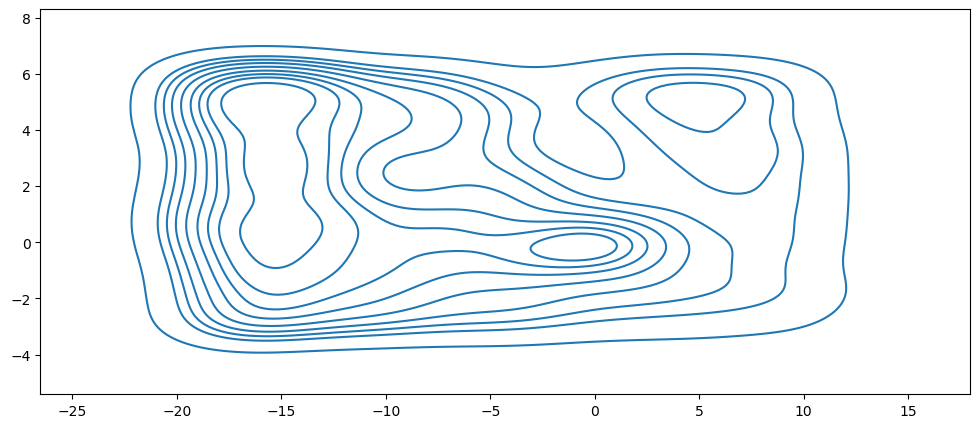

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.kdeplot(x = c_stream.phi1.degree[mask], y = c_stream.phi2.degree[mask], levels=10)

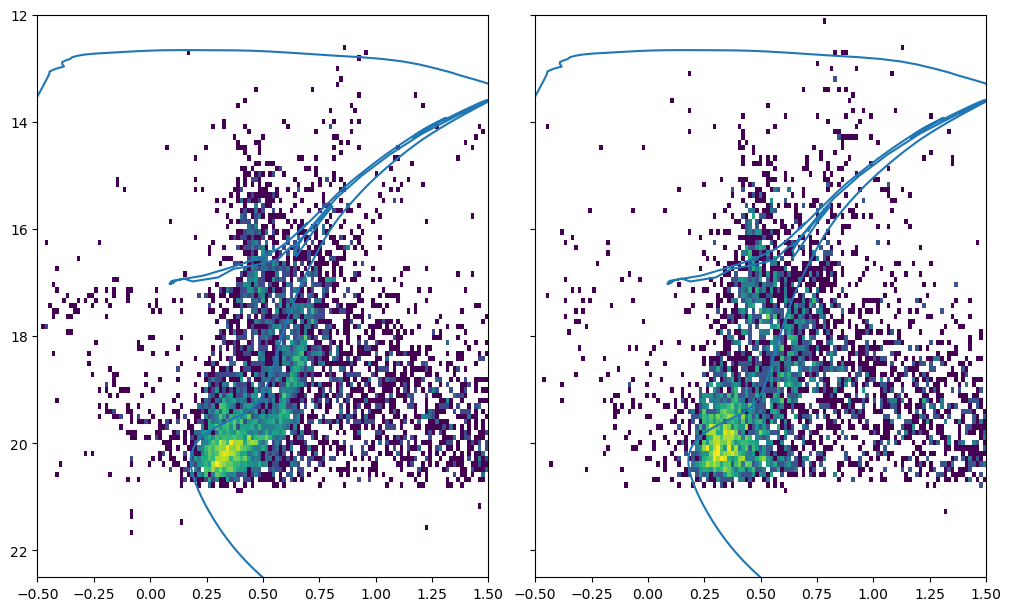

In [26]:
mask = sky_track_mask & pm_box_mask
off_mask = off_track_mask & pm_box_mask

color = g.g0 - g.i0
mag = g.r0

fig, axes = plt.subplots(
    1, 2, figsize=(10, 6), sharex=True, sharey=True, 
    constrained_layout=True
)

bins = (
    np.linspace(-0.5, 1.5, 128),
    np.linspace(10, 22.5, 128)
)
axes[0].hist2d(
    color[mask],
    mag[mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[1].hist2d(
    color[off_mask],
    mag[off_mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[0].set_ylim(22.5, 12)

for ax in axes:
    ax.plot(
        iso1.mag_1 - iso1.mag_2, 
        iso.mag_2  + coord.Distance(dist_interp(0.)*u.kpc).distmod.value, 
        marker='',
        color='tab:blue'
    )



In [27]:
c_stream.phi1.degree.min()

-19.767877322619253

In [28]:
c_stream.phi2.degree.max()

6.244985937517666

In [29]:
data.colnames

['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'phot_g_mean_mag',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_bp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'ruwe',
 'astrometric_matched_transits',
 'phi1',
 'phi2',
 'objID',
 'raMean',
 'decMean',
 'nDetections',
 'ng',
 'nr',
 'ni',
 'nz',
 'ny',
 'gMeanPSFMag',
 'rMeanPSFMag',
 'iMeanPSFMag',
 'zMeanPSFMag',
 'yMeanPSFMag',
 'gMeanPSFMagErr',
 'rMeanPSFMagErr',
 'iMeanPSFMagErr',
 'zMeanPSFMagErr',
 'yMeanPSFMagErr',
 'g0',
 'r0',
 'i0',
 'z0',
 'y0']

In [30]:
data['ra'].size

1601990

In [31]:
# data["pm_ra"], data["pm_dec"], data["phi1"], data["phi2"], data["g0"], data["r0"], data["i0"]

In [32]:
print(mask.sum())

6704


In [33]:
# Agnostic cleaning
data_frame=data.to_pandas()
data_frame.iloc[29]

source_id                       1.152923e+18
ra                              2.249620e+02
dec                             7.788314e-02
parallax                        2.355163e-01
parallax_error                  9.672960e-01
pmra                           -1.004724e+01
pmra_error                      1.645496e+00
pmdec                          -1.082997e+00
pmdec_error                     1.681703e+00
ra_parallax_corr               -1.543575e-01
ra_pmra_corr                   -5.625816e-02
ra_pmdec_corr                  -2.214558e-02
dec_parallax_corr               2.184436e-03
dec_pmra_corr                   8.929707e-02
dec_pmdec_corr                 -2.864714e-01
parallax_pmra_corr             -2.298246e-01
parallax_pmdec_corr            -1.631733e-02
pmra_pmdec_corr                -6.140399e-01
phot_g_mean_mag                 2.064091e+01
phot_g_mean_flux_over_error     9.770776e+01
phot_bp_mean_mag                2.094797e+01
phot_bp_mean_flux_over_error    3.402363e+00
phot_rp_me

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
import pandas as pd

In [35]:
data_frame["i0"]

0          17.592795
1          16.546494
2          18.374595
3          15.293021
4          17.865197
             ...    
1601985    19.896654
1601986    18.845063
1601987    15.911533
1601988    18.697134
1601989    17.864064
Name: i0, Length: 1601990, dtype: float64

In [36]:
my_df = pd.DataFrame(data_frame[["pmra", "pmdec", "phi1", "phi2", "g0", "r0", "i0"]])
#my_df.loc[29]

In [37]:
# some data cleaning for magnitudes ! fixed
condition1 = (my_df['g0'] > 10.5) &  (my_df['r0'] > 10.5) & (my_df['i0'] > 10.5)
condition2 = (-1. < (my_df["g0"] - my_df["r0"])) &  ((my_df["g0"] - my_df["r0"]) < 2.)
df_filtered = my_df[condition1 & condition2]
df_filtered.shape
my_df.loc[1:30], df_filtered[1:30]

(         pmra      pmdec      phi1      phi2          g0         r0         i0
 1   -6.326358 -10.369505  3.227862 -2.328481   16.911271  16.642999  16.546494
 2   -7.534900   3.708973  3.227348 -2.331647   18.894372  18.513201  18.374595
 3   -8.793842  -1.015931  3.240529 -2.352185   15.970544  15.480364  15.293021
 4  -11.541753  -3.060644  3.221165 -2.354262   18.202780  17.948289  17.865197
 5   -2.950958  -0.219532  3.267150 -2.368301   20.932479  19.770433  18.888774
 6   -2.901501  -8.450768  3.239153 -2.361891   20.631043  19.520765  18.891320
 7   -3.587083  -7.772336  3.229234 -2.361981   20.884237  19.754217  18.953839
 8  -10.924039  -6.692210  3.249353 -2.374931   21.703912  20.717772  19.500123
 9   -4.136713  -0.381913  3.237696 -2.375465   20.169612  19.932272  19.866023
 10 -10.770951  -6.975807  3.230818 -2.380339   17.237999  16.870089  16.743119
 11  -5.706684  -8.523328  3.228848 -2.378054   21.775737  20.774517  19.804240
 12  -1.504718 -18.878102  3.200076 -2.3

In [38]:
my_new_df=df_filtered
my_new_df["g0-r0"]=my_new_df["g0"]-my_new_df["r0"]
del my_new_df["i0"]
del my_new_df["g0"]
#my_new_df["phi1"]=my_new_df["phi1"]

/tmp/ipykernel_765791/1568592768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_new_df["g0-r0"]=my_new_df["g0"]-my_new_df["r0"]


In [39]:
my_new_df["g0-r0"]

0          0.614072
1          0.268271
2          0.381171
3          0.490179
4          0.254491
             ...   
1601984    1.090599
1601986    0.372814
1601987    0.537591
1601988    0.372292
1601989    0.750517
Name: g0-r0, Length: 1561134, dtype: float64

In [40]:
import shapely.geometry as geom

In [41]:
coord.Distance(dist_interp(0.)*u.kpc).distmod.value

16.562491179963118

In [42]:
iso.mag +  coord.Distance(dist_interp(0.)*u.kpc).distmod.value

array([30.08566518, 29.92421718, 29.92165218, ..., 26.49188618,
       26.52276518, 26.54874918])

In [43]:
points = np.zeros([len(iso.mag_1), 2])
# Fix
for ind in range(len(iso.mag_1)):
    #print(ind)
    points[ind, 0] = iso.mag_1[ind] - iso.mag_2[ind]
    points[ind, 1] = iso.mag_1[ind] + coord.Distance(dist_interp(0.)*u.kpc).distmod.value
print(points)

[[ 1.360765   30.08566518]
 [ 1.341248   29.92421718]
 [ 1.340929   29.92165218]
 ...
 [-0.393868   26.49188618]
 [-0.391128   26.52276518]
 [-0.388782   26.54874918]]


In [44]:
line = geom.LineString(points)

In [45]:
line.coords

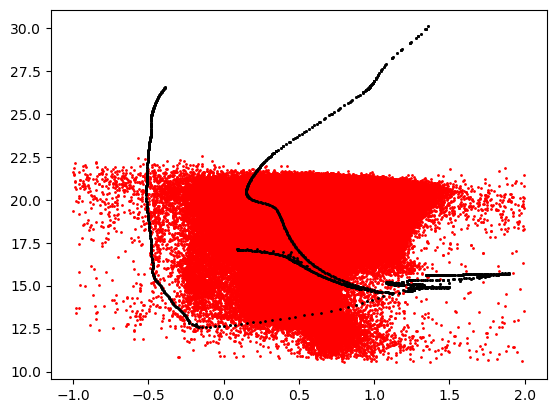

In [46]:
plt.scatter(x=points[:,0], y=points[:,1], s=1, c="k")
plt.scatter(x=my_new_df["g0-r0"], y=my_new_df["r0"], s=1, c="r")
plt.scatter(x=points[:,0], y=points[:,1], s=1, c="k")
#plt.xlim([-0.5, 1.5])
#plt.ylim([22, 12])
plt.show()

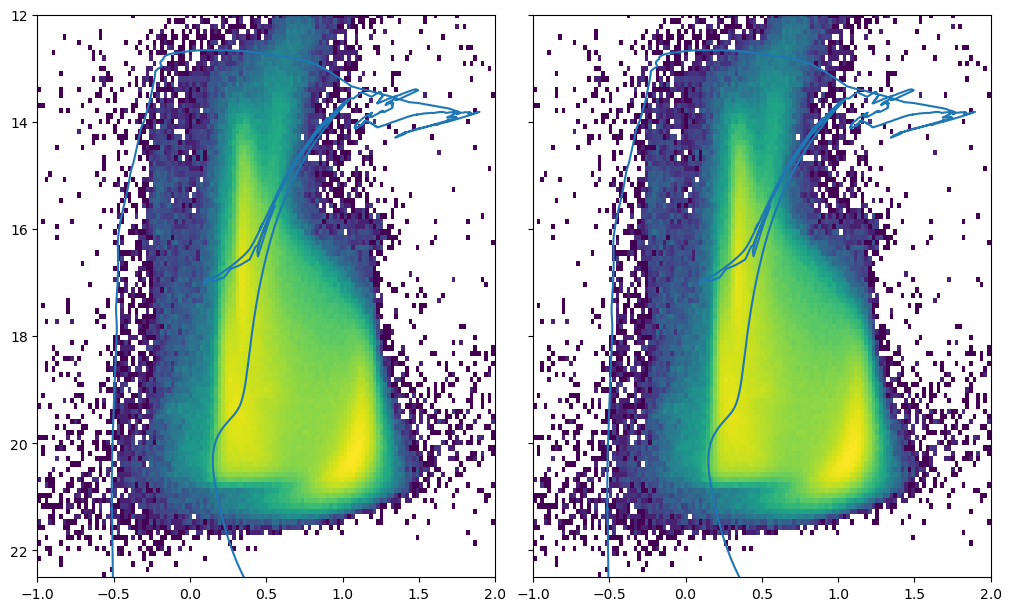

In [47]:
color = my_new_df["g0-r0"]
mag = my_new_df["r0"]

fig, axes = plt.subplots(
    1, 2, figsize=(10, 6), sharex=True, sharey=True, 
    constrained_layout=True
)

bins = (
    np.linspace(-1., 2., 128),
    np.linspace(10, 22.5, 128)
)
axes[0].hist2d(
    color,
    mag,
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[1].hist2d(
    color,
    mag,
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[0].set_ylim(22.5, 12)

for ax in axes:
    ax.plot(
        iso.mag_1 - iso.mag_2, 
        iso.mag_2  + coord.Distance(dist_interp(0.)*u.kpc).distmod.value, 
        marker='',
        color='tab:blue'
    )



In [ ]:
# computing distance in CMD
#my_new_df["dist"] = np.zeros(len(my_new_df["r0"]))
for ind  in range(len(my_new_df["r0"])):
    if (condition1 & condition2)[ind] == True:
        x = my_new_df.loc[ind].at["g0-r0"]
        y = my_new_df.loc[ind].at["r0"]
        point = geom.Point(x, y)
        
        #print(point.x, point.y)
        dist = point.distance(line)
        #print(ind, dist)
        my_new_df.loc[ind].at["dist"] = dist
my_new_df

In [ ]:
plt.hist(my_new_df["dist"])

In [ ]:
my_new_df

In [ ]:
# checking the dataframe, do some imputation if needed

In [ ]:
my_new_df.isna().sum()

In [ ]:
my_new_df.notna().sum()

In [ ]:
# create an abs_scaler object
#my_df = RobustScaler().fit_transform(my_new_df)
my_df = MinMaxScaler().fit_transform(my_new_df)
# test also z-scores normalization but doesn't work well.
my_df.shape
#my_df[0]

In [ ]:
# reduce data size with appropiate cuts on differents features
print(sky_track_mask.sum()), print(pm_box_mask.sum())

In [ ]:
#final_df=my_df[sky_track_mask]#*pm_box_mask]
#print(final_df.shape)
my_df

In [ ]:
my_df.shape
my_df[:,2]=my_df[:,2]*0.8
my_df[:,2].max() # this conserve the aspec ratio betbeen angular coordinates!

In [ ]:
# using kdcount for fof id

In [ ]:
from kdcount import cluster
mean_distance = 1./(1562109.)**(1/3)
print(mean_distance)
dataset = cluster.dataset(my_df, boxsize=1.)
r = cluster.fof(dataset, 1.5*mean_distance)
# test the standart value 0.2 and just recover the GC, also test 0.4, 0.5, 0.6, 0.8, 1, 1.5 in order to percolate the stream.
# 0.8 mean distance percolate all the field easily

In [ ]:
r.N, r.labels, r.length.max(), r.indices

In [ ]:
plt.hist(r.length, range=[10,500])

In [ ]:
r.length.shape

In [ ]:
r.length[0], r.length[1], r.length[2]

In [ ]:
r.labels[0], r.labels[1], r.labels[2]

In [ ]:
#indices0 = r.find(1585800)
#indices1 = r.find(r.labels[1])
#indices2 = r.find(r.labels[2])

In [ ]:
r.offset[0], r.length[0]

In [ ]:
indices0 = r.indices[r.offset[0]:r.length[0]]
indices1 = r.indices[r.offset[1]:r.offset[1]+r.length[1]]
indices2 = r.indices[r.offset[2]:r.offset[2]+r.length[2]]
indices3 = r.indices[r.offset[3]:r.offset[3]+r.length[3]]

In [ ]:
# create mask in order to recover stars from the bigest_fof_object
mask_biggest_fof_object = np.zeros(my_df.shape[0], dtype=bool)
mask_second_fof_object = np.zeros(my_df.shape[0], dtype=bool)
mask_third_fof_object = np.zeros(my_df.shape[0], dtype=bool)
mask_fourth_fof_object = np.zeros(my_df.shape[0], dtype=bool)

In [ ]:
for i in range(1,len(indices0)):
    mask_biggest_fof_object[indices0[i]] = True
for i in range(1,len(indices1)):
    mask_second_fof_object[indices1[i]] = True
for i in range(1,len(indices2)):
    mask_third_fof_object[indices2[i]] = True
for i in range(1,len(indices3)):
    mask_fourth_fof_object[indices3[i]] = True

In [ ]:
bigest_fof_object = my_df[mask_biggest_fof_object]
second_fof_object = my_df[mask_second_fof_object]
third_fof_object = my_df[mask_third_fof_object]
fourth_fof_object = my_df[mask_fourth_fof_object]

In [ ]:
bigest_fof_object
second_fof_object
third_fof_object
fourth_fof_object

In [ ]:
X = my_df[:, 2] # phi1
Y = my_df[:, 3] # phi2
x = bigest_fof_object[:, 2]
y = bigest_fof_object[:, 3]
x1 = second_fof_object[:, 2]
y1 = second_fof_object[:, 3]
x2 = third_fof_object[:, 2]
y2 = third_fof_object[:, 3]
x3 = fourth_fof_object[:, 2]
y3 = fourth_fof_object[:, 3]
#plt.scatter(X, Y, c="blue", s=1)
plt.scatter(x, y, c="red", s=1)
plt.scatter(x1, y1, c="green", s=1)
plt.scatter(x2, y2, c="yellow", s=1)
plt.scatter(x3, y3, c="magenta", s=1)
plt.show()

In [ ]:
X = my_df[:, 0] # mura
Y = my_df[:, 1] # mudec
x = bigest_fof_object[:, 0]
y = bigest_fof_object[:, 1]
x1 = second_fof_object[:, 0]
y1 = second_fof_object[:, 1]
x2 = third_fof_object[:, 0]
y2 = third_fof_object[:, 1]
x3 = fourth_fof_object[:, 0]
y3 = fourth_fof_object[:, 1]
#plt.scatter(X, Y, c="blue", s=1)
plt.scatter(x, y, c="red", s=1)
plt.scatter(x1, y1, c="green", s=1)
plt.scatter(x2, y2, c="yellow", s=1)
plt.scatter(x3, y3, c="magenta", s=1)
plt.show()

In [ ]:
X = my_df[:,5]  # color  g0 - i0
Y = my_df[:,4] # magnitude r0
x = bigest_fof_object[:, 5] #- bigest_fof_object[:, 6]
y = bigest_fof_object[:, 4]
x1 = second_fof_object[:, 5] #- second_fof_object[:, 6]
y1 = second_fof_object[:, 4]
x2 = third_fof_object[:, 5] #- third_fof_object[:, 6]
y2 = third_fof_object[:, 4]
x3 = fourth_fof_object[:, 5] #- fourth_fof_object[:, 6]
y3 = fourth_fof_object[:, 4]
#plt.scatter(X, Y, c="blue", s=1)
plt.scatter(x, y, c="red", s=1)
plt.scatter(x1, y1, c="green", s=1)
plt.scatter(x2, y2, c="yellow", s=1)
plt.scatter(x3, y3, c="magenta", s=1)
#plt.scatter(iso.mag_1-iso.mag_2,iso.mag_1+iso.distance_modulus,marker='.',c='k')
plt.show()

In [ ]:
# old experiments using agglomerative clustering in embedded manifold

In [ ]:
# using spectral embedding to reduce dimensionality, test the other dimension reduction techniques

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from time import time


# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(final_df)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

# Visualize the clustering
def plot_clustering(X_red, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    
    plt.scatter(
            *X_red.T, c = clustering.labels_, cmap = 'rainbow'
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=6)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, "%s linkage" % linkage)


plt.show()

In [ ]:
clustering = clustering.fit(X_red)

In [ ]:
plot_clustering(X_red, "%s linkage" % linkage)

In [ ]:
X_red.size

In [ ]:
#column = np.array(clustering.labels_)
X_red = np.column_stack((X_red,clustering.labels_))
#np.concatenate([X_red, column], axis=1)
X_red

In [ ]:
X_red.size, clustering.labels_.shape

In [ ]:
final_df.size

In [ ]:
X_red.shape

In [ ]:
final_df.shape

In [ ]:
final_df = np.column_stack((final_df,clustering.labels_))

In [ ]:
final_df.shape

In [ ]:
# diagnostic plots for clusters members

In [ ]:
X = final_df[:,0] # pmra
Y = final_df[:,1] # pmdec
colores = final_df[:,7].astype(int)

In [ ]:
plt.scatter(X, Y, c = colores, cmap = 'rainbow', s=1)
plt.show()

In [ ]:
X = final_df[:,2] # phi1
Y = final_df[:,3] # phi2
colores = final_df[:,7].astype(int)

In [ ]:
plt.scatter(X, Y, c = colores, cmap = 'rainbow', s=1)
plt.show()

In [ ]:
X = final_df[:,4] - final_df[:,6] # color  g0 - i0
Y = final_df[:,5] # magnitude r0
colores = final_df[:,7].astype(int)

In [ ]:
plt.scatter(X, Y, c = colores, cmap = 'rainbow', s=1)
plt.show()